In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.neighbors.kde import KernelDensity
%matplotlib inline


In [7]:
faithful = pd.read_csv('oldfaithful.dat', delim_whitespace=True)
faithful["Duration"] = faithful["eruptions"]*60
faithful["Duration"].mean()

209.26698529411763

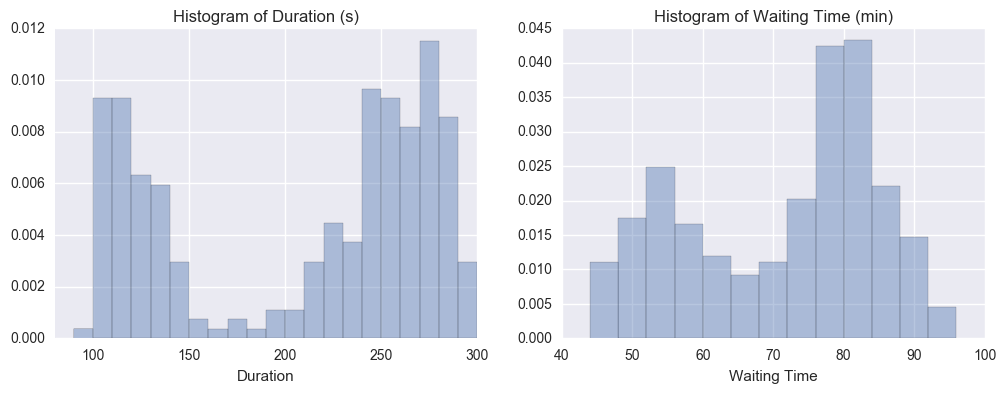

In [4]:
plt.figure(figsize=(12,4))
plt.figure(1)
ax1 = plt.subplot(121)
ax2= plt.subplot(122)
sns.distplot(faithful["Duration"], bins=range(90, 310, 10), kde=False, norm_hist=True, ax=ax1)
sns.distplot(faithful["Waiting Time"], bins=range(44, 98, 4), kde=False, norm_hist=True, ax=ax2)
ax1.set_xlim(80,300)
ax1.set_title('Histogram of Duration (s)')
ax2.set_title('Histogram of Waiting Time (min)')

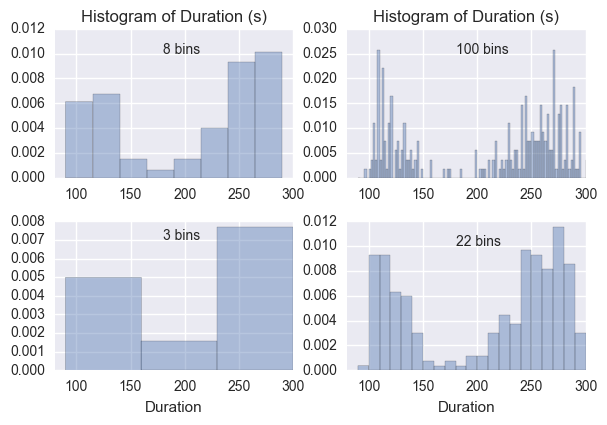

In [5]:
plt.figure(figsize=(24,8))
fig = plt.figure(2)
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)
fig.tight_layout() 

sns.distplot(faithful["Duration"], bins=range(90, 310, 25), kde=False, norm_hist=True, ax=ax1)
sns.distplot(faithful["Duration"], bins=range(90, 310, 2), kde=False, norm_hist=True, ax=ax2)
sns.distplot(faithful["Duration"], bins=range(90, 310, 70), kde=False, norm_hist=True, ax=ax3)
sns.distplot(faithful["Duration"], bins=range(90, 310, 10), kde=False, norm_hist=True, ax=ax4)
ax1.set_xlim(80,300)
ax2.set_xlim(80,300)
ax3.set_xlim(80,300)
ax4.set_xlim(80,300)

ax1.text(180, 0.010, '8 bins')
ax2.text(180, 0.025, '100 bins')
ax3.text(180, 0.007, '3 bins')
ax4.text(180, 0.010, '22 bins')

ax1.set_title('Histogram of Duration (s)')
ax2.set_title('Histogram of Duration (s)')
ax1.set_xlabel('')
ax2.set_xlabel('')
#ax3.set_title('Histogram of Duration (s)')
#ax4.set_title('Histogram of Duration (s)')

### Bandwith estimate

We estimate bandwith for kernel density using:

$$
h = (\frac{4}{3})^{\frac{1}{5}} sn^{\frac{-1}{5}}
$$

In [29]:
waiting_sd = faithful[['Waiting Time']].std().get_value(label='Waiting Time')
duration_sd = faithful[['Duration']].std().get_value(label='Duration')

h_const = (4.0/3)**(1/5)*len(faithful)**(-1/5)
h_waiting = h_const*waiting_sd
h_duration = h_const*duration_sd
#print(h_waiting)
#print(h_duration)
#print(waiting_sd)
#print(duration_sd)

In [67]:
X_plot = np.linspace(40, 100, 1000)[:, np.newaxis]
#X_plot

In [45]:
waiting_gauss_kde = KernelDensity(kernel='gaussian', bandwidth=h_waiting).fit(faithful[['Waiting Time']].as_matrix() )

In [52]:
log_dens = waiting_gauss_kde.score_samples(X_plot)

In [55]:
waiting_guass_density = np.exp(log_dens)
#waiting_guass_density

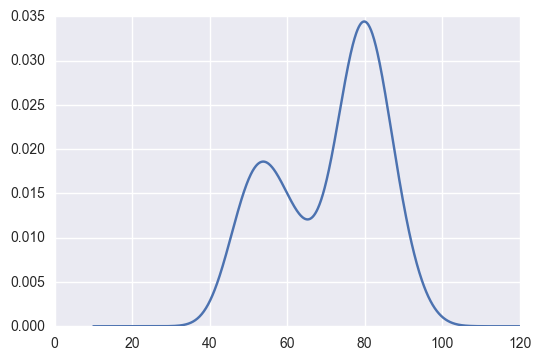

In [56]:
plt.plot(X_plot[:, 0], waiting_guass_density)

In [57]:
def get_kernel_density(kernel, bandwith, data, domain):
    kde = KernelDensity(kernel=kernel, bandwidth=bandwith).fit(data)
    log_dens = kde.score_samples(domain)
    return np.exp(log_dens)

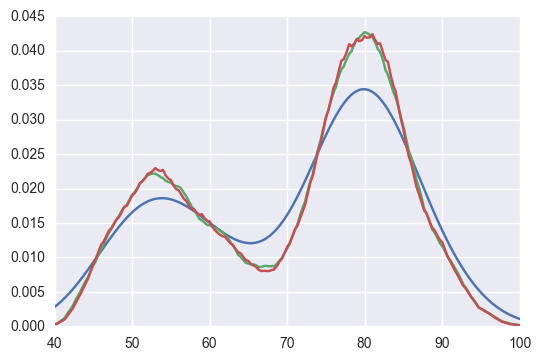

In [68]:
plt.plot(X_plot[:, 0], get_kernel_density(kernel='gaussian', bandwith=h_waiting, data=faithful[['Waiting Time']].as_matrix(), domain=X_plot)) 
plt.plot(X_plot[:, 0], get_kernel_density(kernel='epanechnikov', bandwith=h_waiting, data=faithful[['Waiting Time']].as_matrix(), domain=X_plot))
plt.plot(X_plot[:, 0], get_kernel_density(kernel='linear', bandwith=h_waiting, data=faithful[['Waiting Time']].as_matrix(), domain=X_plot))


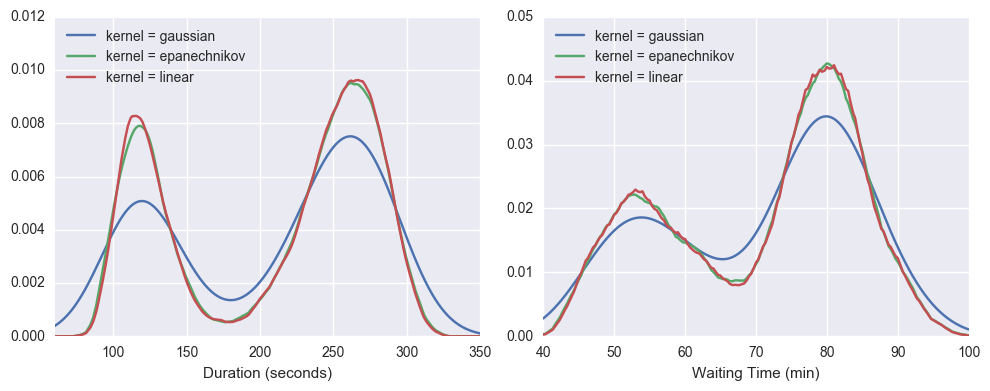

In [102]:
X_plot_waiting = np.linspace(40, 100, 1000)[:, np.newaxis]
X_plot_duration = np.linspace(60, 350, 1000)[:, np.newaxis]

waiting = faithful[['Waiting Time']].as_matrix()
duration = faithful[['Duration']].as_matrix()

#plt.figure(figsize=(12,24), dpi=180)
fig4 = plt.figure(4)
fig4.dpi=180
fig4.set_size_inches(10, 4)
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

for kernel in ['gaussian','epanechnikov', 'linear']:
    kde_waiting = KernelDensity(kernel=kernel, bandwidth=h_waiting).fit(waiting)
    log_den_waiting = kde_waiting.score_samples(X_plot_waiting)
    ax2.plot(X_plot_waiting[:,0], np.exp(log_den_waiting), '-', label="kernel = {0}".format(kernel))
    
    kde_duration = KernelDensity(kernel=kernel, bandwidth=h_duration).fit(duration)
    log_den_duration = kde_duration.score_samples(X_plot_duration)
    ax1.plot(X_plot_duration[:,0], np.exp(log_den_duration), '-', label="kernel = {0}".format(kernel))
    
    
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
#ax.plot(data[:, 0], -0.005 - 0.01 * np.random.random(data.shape[0]), '+k')
ax1.set_xlim(60, 350)
ax1.set_ylim(0, 0.012)
ax1.set_xlabel('Duration (seconds)')
ax2.set_xlim(40, 100)
ax2.set_ylim(0, 0.05)
ax2.set_xlabel('Waiting Time (min)')
fig4.tight_layout()

In [103]:
fig4.savefig('kernel_density.png', dpi=180)

In [43]:
faithful.columns

Index(['eruptions', 'Waiting Time', 'Duration'], dtype='object')

In [43]:
faithful[['Waiting Time']].as_matrix()[:,0]

array([79, 54, 74, 62, 85, 55, 88, 85, 51, 85, 54, 84, 78, 47, 83, 52, 62,
       84, 52, 79, 51, 47, 78, 69, 74, 83, 55, 76, 78, 79, 73, 77, 66, 80,
       74, 52, 48, 80, 59, 90, 80, 58, 84, 58, 73, 83, 64, 53, 82, 59, 75,
       90, 54, 80, 54, 83, 71, 64, 77, 81, 59, 84, 48, 82, 60, 92, 78, 78,
       65, 73, 82, 56, 79, 71, 62, 76, 60, 78, 76, 83, 75, 82, 70, 65, 73,
       88, 76, 80, 48, 86, 60, 90, 50, 78, 63, 72, 84, 75, 51, 82, 62, 88,
       49, 83, 81, 47, 84, 52, 86, 81, 75, 59, 89, 79, 59, 81, 50, 85, 59,
       87, 53, 69, 77, 56, 88, 81, 45, 82, 55, 90, 45, 83, 56, 89, 46, 82,
       51, 86, 53, 79, 81, 60, 82, 77, 76, 59, 80, 49, 96, 53, 77, 77, 65,
       81, 71, 70, 81, 93, 53, 89, 45, 86, 58, 78, 66, 76, 63, 88, 52, 93,
       49, 57, 77, 68, 81, 81, 73, 50, 85, 74, 55, 77, 83, 83, 51, 78, 84,
       46, 83, 55, 81, 57, 76, 84, 77, 81, 87, 77, 51, 78, 60, 82, 91, 53,
       78, 46, 77, 84, 49, 83, 71, 80, 49, 75, 64, 76, 53, 94, 55, 76, 50,
       82, 54, 75, 78, 79

In [45]:
faithful.head()

,eruptions,Waiting Time,Duration
0,3.600,79,216.00
1,1.800,54,108.00
2,3.333,74,199.98
3,2.283,62,136.98
4,4.533,85,271.98


In [3]:
#plt.figure(figsize=(12,8))
#fig3 = plt.figure(figsize=(12,8))
#ax3 = fig3.add_subplot(1,1,1)
#sns.boxplot(data=faithful[['Duration', 'Waiting Time']])
#ax3.set_title("Boxplot of Duration (s) and Waiting time (min)")

In [4]:
#fig3.savefig('old-faithful_boxplot.png', dpi=120)

In [18]:
software = pd.read_csv('software.dat', delim_whitespace=True)

In [19]:
software.head(4)

,Software failures
0,30
1,50
2,55
3,4


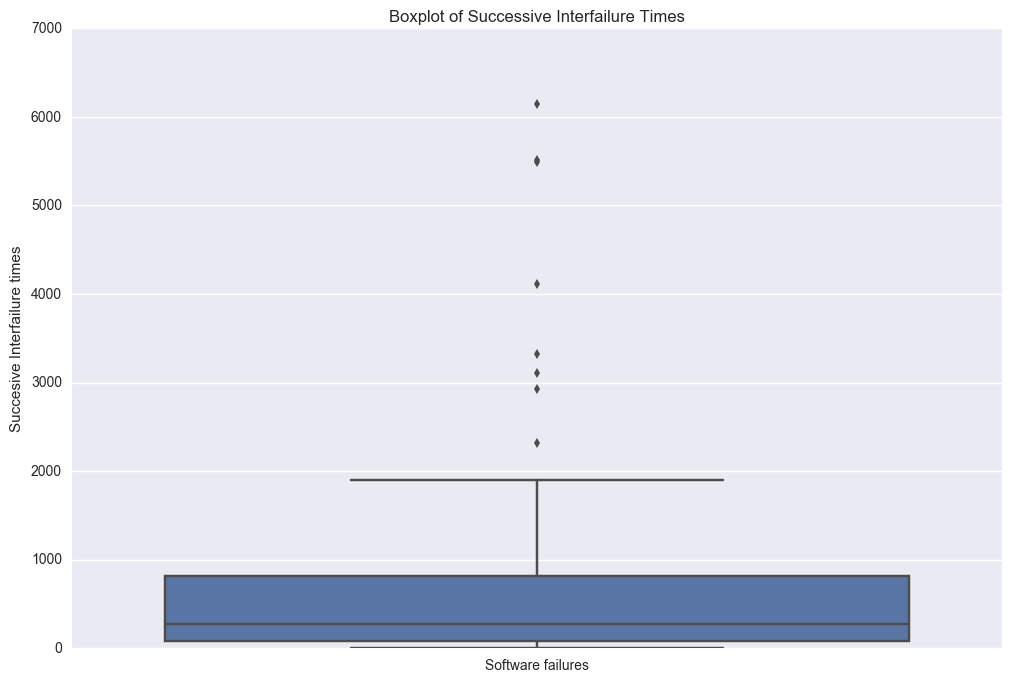

In [20]:
fig4 = plt.figure(figsize=(12,8))
ax4 = fig4.add_subplot(1,1,1)
sns.boxplot(data=software)
ax4.set_title("Boxplot of Successive Interfailure Times")
ax4.set_ylabel("Succesive Interfailure times")
ax4.set_xlabel("")

In [21]:
fig4.savefig('software_boxplot.png', dpi=120)